In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml

In [216]:
read_csv_opts = {'sep': '|',
                 'quotechar': '"',
                 'compression': 'gzip',
                 'encoding': 'utf-8'}

In [217]:
df = pd.read_csv('../input/facil-list.csv.gz', **read_csv_opts)

In [218]:
df.head()

,detloc,name,address,city,county,state,zip,circuit,aor,docket,...,dsm_assigned,dsm_assignment_type,fy18_calendar_days_in_use,fy18_possible_days,fy18_%_of_days_in_use,fy18_total_mandays,fy17_calendar_days_in_use,fy17_%_of_days_in_use,fy17_total_mandays,fy17_max_pop_count
0,ABRDNWA,ABERDEEN CITY JAIL,210 EAST MARKET ST,ABERDEEN,GRAYS HARBOR,WA,98520,9,SEA,SEA,...,No,NaN,0,400,0,0,0,0,0,0
1,ABTHOLD,ABILENE HOLD ROOM,12071 FM 3522,ABILENE,ABILENE,TX,79601,5,DAL,ABT,...,No,NaN,0,400,0,0,0,0,0,0
2,ABRXSPA,ABRAXAS ACADEMY DETENTION CENTER,1000 ACADEMY DRIVE,MORGANTOWN,BERKS,PA,19543,3,PHI,BRK,...,No,NaN,35,400,9,800,372,102,1207,5
3,RICRANS,ACI (CRANSTON RHODE ISLAND),39 HOWARD AVE,CRANSTON,PROVIDENCE,RI,02920,1,BOS,BOS,...,No,NaN,0,400,0,0,0,0,0,0
4,ADACOID,ADA COUNTY JAIL,7210 BARRISTER DRIVE,BOISE,ADA,ID,83704,9,SLC,HEL,...,No,NaN,0,400,0,0,0,0,0,0


In [219]:
df.columns

Index(['detloc', 'name', 'address', 'city', 'county', 'state', 'zip',
       'circuit', 'aor', 'docket',
       ...
       'dsm_assigned', 'dsm_assignment_type', 'fy18_calendar_days_in_use',
       'fy18_possible_days', 'fy18_%_of_days_in_use', 'fy18_total_mandays',
       'fy17_calendar_days_in_use', 'fy17_%_of_days_in_use',
       'fy17_total_mandays', 'fy17_max_pop_count'],
      dtype='object', length=135)

In [220]:
# adp = []

# for col in df.columns: adp.append('ADP' in col)

In [221]:
alos = ['fy18_alos',
        'fy17_alos',
        'fy16_alos',
        'fy15_alos']

adp = ['fy18_adp',
       'fy17_adp',
       'fy16_adp',
       'fy15_adp']

In [222]:
df.loc[:,alos] = df.loc[:,alos].astype(float)

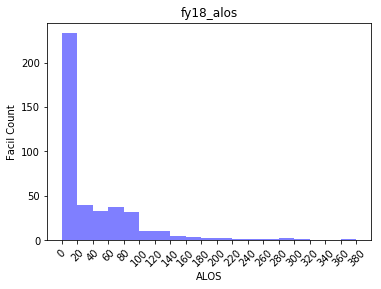

In [223]:
num_bins = np.arange(0,400,20)
data = df['fy18_alos']
# the histogram of the data
n, bins, patches = plt.hist(data, num_bins, facecolor='blue', alpha=0.5)
 
plt.plot()
plt.xlabel('ALOS')
plt.xticks(np.arange(0, 400, step=20), rotation=45)
plt.ylabel('Facil Count')
# plt.yticks(np.arange(0, 300, step=50))
# plt.ylim(-5, 275)
plt.title('fy18_alos')
 
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15) 
# plt.savefig('output/nwdc_solitary_length_hist.png', bbox_inches='tight')
plt.show()

In [224]:
df['fy18_alos'].min()

0.0

In [225]:
df['fy18_alos'].max()

400.0

In [226]:
alos.reverse()

In [227]:
adp.reverse()

In [228]:
alos

['fy15_alos', 'fy16_alos', 'fy17_alos', 'fy18_alos']

In [229]:
target_facil = 'CSCNWWA'
target_facil_2 = 'ADLNTCA'

In [237]:
df.set_index('detloc').loc[target_facil, alos].values

array([82.0, 86.0, 87.0, 97.0], dtype=object)

[  0  30  60  90 120 150 180 210 240 270 300 330 360 390]
[3 3 3 4]
[3 3 3 4]
[3 3 3 4]
[3 3 3 4]


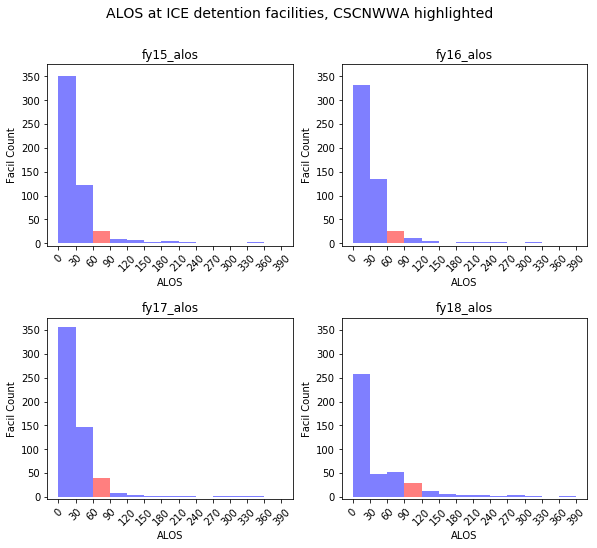

In [259]:
bin_min = 0
bin_max = 400
step = 30

num_bins = np.arange(bin_min, bin_max, step)

target_alos = df.set_index('detloc').loc[target_facil, alos]

fig = plt.figure(figsize=(10,8))
i = 0
for fy in alos:
    ax=plt.subplot(2,2,i+1)
    
    data = df.set_index('detloc')[fy]
    
    n, bins, patches = plt.hist(data, num_bins, facecolor='blue', alpha=0.5)
    
    target_bins = np.digitize(list(target_alos.values), list(bins))
    
    patches[target_bins[i]-1].set_fc('r')
 
    plt.xlabel('ALOS')
    plt.xticks(np.arange(bin_min, bin_max, step=step), rotation=45)
    plt.ylabel('Facil Count')
    plt.yticks(np.arange(0, 400, step=50))
    plt.ylim(-5, 375)
    plt.title(f'{fy}')

    # Tweak spacing to prevent clipping of ylabel
    plt.subplots_adjust(left=0.15) 
    i = i + 1
    # plt.savefig('output/nwdc_solitary_length_hist.png', bbox_inches='tight')
plt.suptitle(f'ALOS at ICE detention facilities, {target_facil} highlighted', fontsize=14)
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.show()

In [258]:
target_bins[0]-1

2

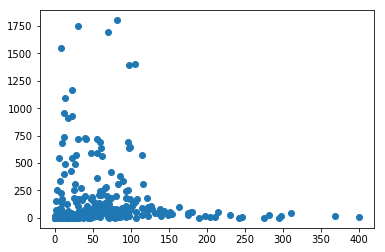

In [181]:
plt.scatter(x='fy18_alos', y='fy18_adp', data=df)

In [182]:
fys = ['fy15',
       'fy16',
       'fy17',
       'fy18']

In [210]:
# Exclude outliers (definitely a better way to do this)
data = df.copy()
data = data[data.loc[:,'fy15_alos'] < 500]
data = data[data.loc[:,'fy16_alos'] < 500]
data = data[data.loc[:,'fy17_alos'] < 500]
data = data[data.loc[:,'fy18_alos'] < 500]

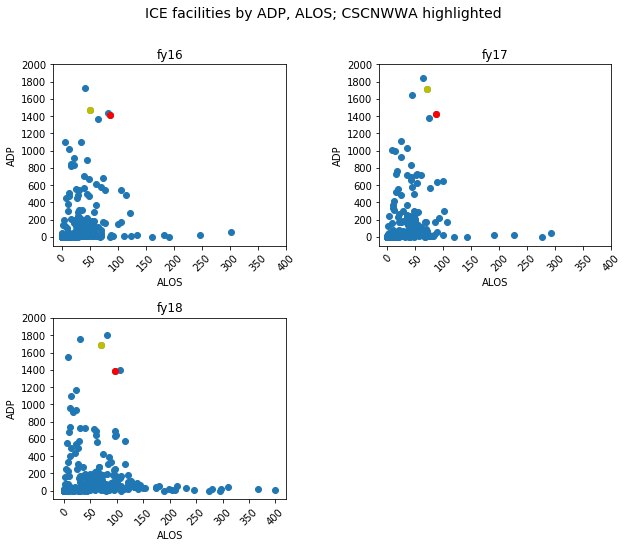

In [213]:
fig = plt.figure(figsize=(10,8))
i = 0
for fy in fys:
    adp_col = f'{fy}_adp'
    alos_col = f'{fy}_alos'
    ax=plt.subplot(2,2,i+1)
    i = i+1
    
    plt.scatter(x=alos_col, y=adp_col, data=data)
    plt.scatter(x=alos_col, y=adp_col, c='r', data=data.set_index('detloc').loc[target_facil])
    plt.scatter(x=alos_col, y=adp_col, c='y', data=data.set_index('detloc').loc[target_facil_2])
    
    plt.xlabel('ALOS')
    plt.xticks(np.arange(0, 450, step=50), rotation=45)
    plt.ylabel('ADP')
    plt.yticks(np.arange(0, 2001, step=200))
    plt.ylim(-100, 2000)
    plt.title(f'{fy}')

plt.suptitle(f'ICE facilities by ADP, ALOS; {target_facil} highlighted', fontsize=14)
plt.subplots_adjust(wspace=.4, hspace=.4)
plt.show;

In [185]:
solitary = pd.read_csv('../input/solitary_stats.csv', sep='|')

In [186]:
solitary = solitary.set_index('Unnamed: 0')

In [187]:
solitary.index.name = 'detloc'

In [188]:
solitary.columns = solitary.columns.str.lower()
solitary.columns = solitary.columns.str.replace(' ', '_')

In [189]:
sol_cols = list(solitary.columns)

In [190]:
solitary = solitary.dropna(how='all', axis=0)

In [191]:
sol_index = list(solitary.index)

In [192]:
data = data.set_index('detloc').join(solitary)

In [193]:
data = data.loc[sol_index,:]

/home/philneff/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [194]:
fys = ['fy16',
       'fy17',
       'fy18']

In [195]:
data.columns = data.columns.str.lower()

In [196]:
data.loc[:,sol_cols]

,fy16_solitary_alos,fy17_solitary_alos,fy18_solitary_alos,fy16_solitary_count,fy17_solitary_count,fy18_solitary_count,fy17_solitary_adp
detloc,,,,,,,
ADLNTCA,42.463023,31.171750,23.248927,311.0,624.0,256.0,58.046575
ATLANGA,62.444444,65.066667,31.818182,9.0,15.0,12.0,1.991781
BAKERFL,65.625000,38.759259,30.621622,24.0,54.0,39.0,5.501370
BERGENJ,20.000000,NaN,NaN,1.0,0.0,0.0,0.000000
BOONEKY,NaN,57.000000,NaN,0.0,1.0,0.0,0.158904
BOPHON,NaN,42.000000,NaN,0.0,1.0,0.0,0.117808
BRINDMA,25.500000,20.529412,44.250000,6.0,17.0,4.0,1.002740
BTV,33.741935,25.877778,14.512500,62.0,90.0,86.0,8.002740
BUTLEKS,NaN,74.000000,NaN,0.0,2.0,0.0,0.410959


In [197]:
len(data)

88

In [198]:
data.loc[:,sol_cols] = data.loc[:,sol_cols].dropna(how='all')
data.loc[:,sol_cols] = data.loc[:,sol_cols].fillna(0)

In [199]:
len(data)

88

In [200]:
data.loc[:,adp] = data.loc[:,adp].fillna(0)
data.loc[:,alos] = data.loc[:,alos].fillna(0)

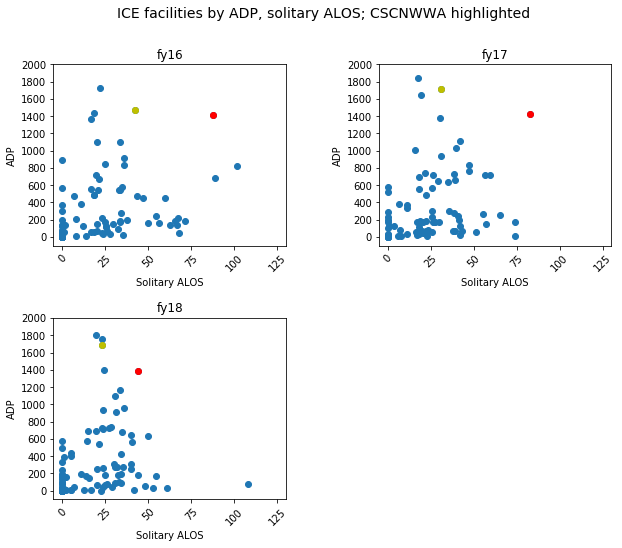

In [201]:
fig = plt.figure(figsize=(10,8))
i = 0
for fy in fys:
    x = f'{fy}_solitary_alos'
    y = f'{fy}_adp'
    ax=plt.subplot(2,2,i+1)
    i = i+1
    
    plt.scatter(x=x, y=y, data=data)
    plt.scatter(x=x, y=y, c='r', data=data.loc[target_facil])
    plt.scatter(x=x, y=y, c='y', data=data.loc[target_facil_2])
    
    plt.xlabel('Solitary ALOS')
    plt.xlim(-5, 130)
    plt.xticks(np.arange(0, 126, step=25), rotation=45)
    plt.ylabel('ADP')
    plt.yticks(np.arange(0, 2001, step=200))
    plt.ylim(-100, 2000)
    plt.title(f'{fy}')

plt.suptitle(f'ICE facilities by ADP, solitary ALOS; {target_facil} highlighted', fontsize=14)
plt.subplots_adjust(wspace=.4, hspace=.4)
plt.show;

In [202]:
# data.loc[:,sol_cols] = np.log(data.loc[:,sol_cols]+1)

In [203]:
# data.loc[:,alos] = np.log(data.loc[:,alos]+1)

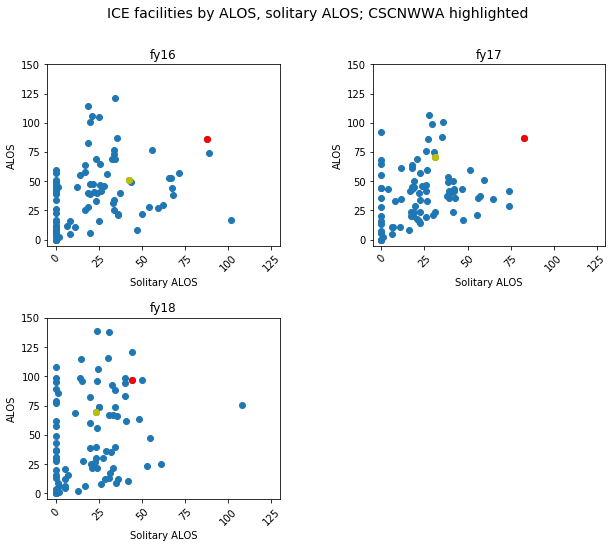

In [204]:
fig = plt.figure(figsize=(10,8))
i = 0
for fy in fys:
    x = f'{fy}_solitary_alos'
    y = f'{fy}_alos'
    ax=plt.subplot(2,2,i+1)
    i = i+1
    
    plt.scatter(x=x, y=y, data=data)
    plt.scatter(x=x, y=y, c='r', data=data.loc[target_facil])
    plt.scatter(x=x, y=y, c='y', data=data.loc[target_facil_2])
    
    plt.xlabel('Solitary ALOS')
    plt.xlim(-5, 130)
    plt.xticks(np.arange(0, 126, step=25), rotation=45)
    plt.ylabel('ALOS')
    plt.yticks(np.arange(0, 151, step=25))
    plt.ylim(-5, 150)
    plt.title(f'{fy}')

plt.suptitle(f'ICE facilities by ALOS, solitary ALOS; {target_facil} highlighted', fontsize=14)
plt.subplots_adjust(wspace=.4, hspace=.4)
plt.show;

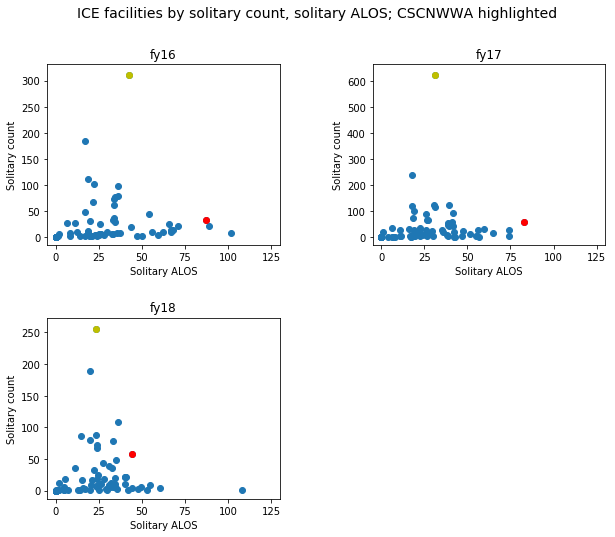

In [205]:
fig = plt.figure(figsize=(10,8))
i = 0
for fy in fys:
    x = f'{fy}_solitary_alos'
    y = f'{fy}_solitary_count'
    ax=plt.subplot(2,2,i+1)
    i = i+1
    
    plt.scatter(x=x, y=y, data=data)
    plt.scatter(x=x, y=y, c='r',data=data.loc[target_facil])
    plt.scatter(x=x, y=y, c='y', data=data.loc[target_facil_2])
    
    plt.xlabel('Solitary ALOS')
    plt.xlim(-5, 130)
    plt.xticks(np.arange(0, 126, step=25))
    plt.ylabel('Solitary count')
#     plt.yticks(np.arange(0, 350, step=50))
#     plt.ylim(-15, 350)
    plt.title(f'{fy}')

plt.suptitle(f'ICE facilities by solitary count, solitary ALOS; {target_facil} highlighted', fontsize=14)
plt.subplots_adjust(wspace=.4, hspace=.4)
plt.show;

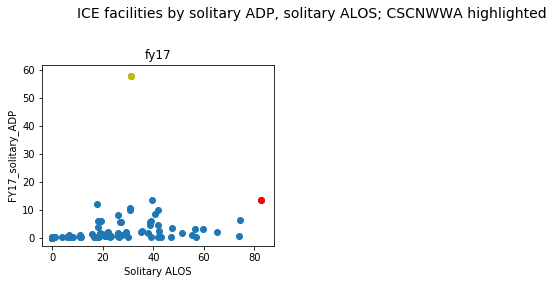

In [206]:
fig = plt.figure(figsize=(10,8))
i = 0
for fy in ['fy17']:
    x = f'{fy}_solitary_alos'
    y = f'{fy}_solitary_adp'
    ax=plt.subplot(2,2,i+1)
    i = i+1
    
    plt.scatter(x=x, y=y, data=data)
    plt.scatter(x=x, y=y, c='r', data=data.loc[target_facil])
    plt.scatter(x=x, y=y, c='y', data=data.loc[target_facil_2])
    
    plt.xlabel('Solitary ALOS')
#     plt.xticks(np.arange(0, 100, step=10), rotation=45)
    plt.ylabel('FY17_solitary_ADP')
#     plt.yticks(np.arange(0, 100, step=10))
#     plt.ylim(-5, 70)
    plt.title(f'{fy}')

plt.suptitle(f'ICE facilities by solitary ADP, solitary ALOS; {target_facil} highlighted', fontsize=14)
plt.subplots_adjust(wspace=.4, hspace=.4)
plt.show;